# **Project: Cyber Security Attack Type Detection**
The notebook has four part:
- Part 1: Import necessary libraries
- Part 2: EDA
- Part 3: Feature Engineering
- Part 4: Build the machine learning models: XGBoost, Random Forest, Multi Logistic Regression
- Part 5: Remark

# Part 1: Import necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

import joblib


In [4]:
# Load the dataset
file_path = r'C:\Users\nguye\Desktop\Projects\Cyber_Security\cybersecurity_attacks.csv'
pd.set_option('display.max_columns', None)
data = pd.read_csv(file_path)

# Display basic information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# Part 2: EDA

In [5]:
data.describe()
data.head(2)
# Check the number of unique values in each column
data_columns = data.columns
for col in data_columns:
    print(f"Name of columns: {col}")
    print("Number of unique data is:",data[col].nunique())
    print("Value Count of the data is:\n",data[col].value_counts())
    print()

Name of columns: Timestamp
Number of unique data is: 39997
Value Count of the data is:
 Timestamp
2022-06-11 14:28:15    2
2022-06-06 12:12:43    2
2022-04-17 20:05:34    2
2023-05-30 06:33:58    1
2021-01-11 23:03:29    1
                      ..
2022-01-27 11:03:06    1
2020-10-23 03:26:01    1
2020-12-17 14:28:29    1
2022-06-23 07:20:25    1
2023-10-10 11:59:52    1
Name: count, Length: 39997, dtype: int64

Name of columns: Source IP Address
Number of unique data is: 40000
Value Count of the data is:
 Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
                  ..
8.73.26.79         1
15.232.18.232      1
71.157.156.214     1
200.15.203.154     1
14.102.21.108      1
Name: count, Length: 40000, dtype: int64

Name of columns: Destination IP Address
Number of unique data is: 40000
Value Count of the data is:
 Destination IP Address
84.9.164.252       1
131.248.231.186    1
48.157.39.218      1
112.135.140

In [6]:
# Check missing values
missing_data = data.isnull().sum()
print(data.isnull().sum())
print("\nMissing percentage: ", ((missing_data/ len(data))*100))

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Missing percentage:  Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.

In [7]:
# Handing missing data by filling it
data.fillna("No Data", inplace=True)
# Confirm no missing data remains
missing_data_after = data.isnull().sum()
print("\nMissing data after filling:")
print(missing_data_after)


Missing data after filling:
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


In [8]:
data.info()
# It shows that Timestamps need to change to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [9]:
# Convert timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extracting time-based features
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year

# Remove duplicate records
data = data.drop_duplicates()
data.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,No Data,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Data,Log Data,No Data,Firewall,7,2,8,2020
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,11,2022


## 3. Anomaly Detection Using IQR

Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], dtype='object')


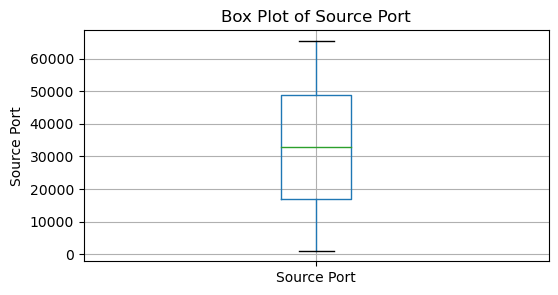

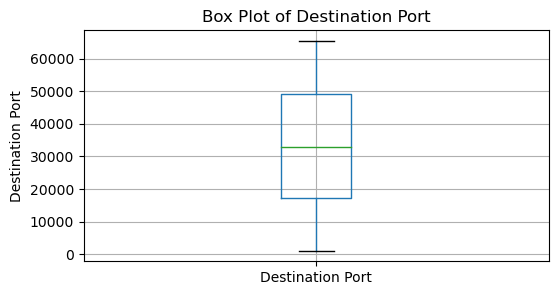

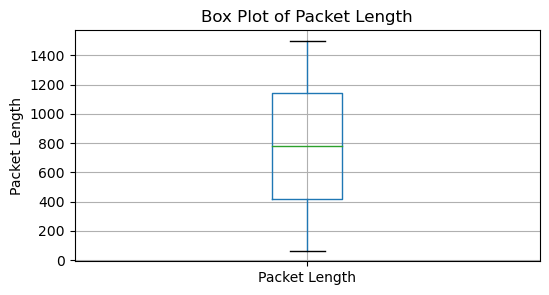

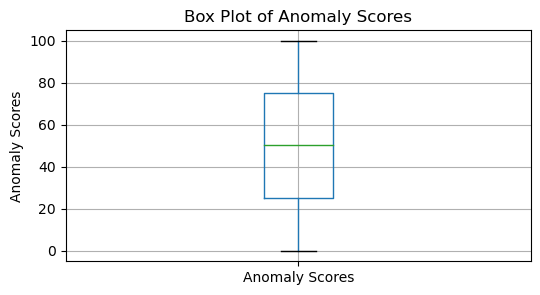

{'Source Port': 0, 'Destination Port': 0, 'Packet Length': 0, 'Anomaly Scores': 0}


In [10]:
# Identify the numeric columns to detect outliers:
numeric_columns = data.select_dtypes(include=["number"]).columns[0:4]
print(numeric_columns)

# Initialize a dictionary to store outliers counts
outliers_dict = {}
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    # filtering outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_dict[col] = len(outliers)
    # create a box plot for each columns:
    plt.figure(figsize=(6,3))
    data.boxplot(column=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()
print(outliers_dict)

List of columns are going to be drawn:
['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']


C:\Users\nguye\AppData\Local\Temp\ipykernel_29528\3341173578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis", ax=axes[i])
C:\Users\nguye\AppData\Local\Temp\ipykernel_29528\3341173578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis", ax=axes[i])
C:\Users\nguye\AppData\Local\Temp\ipykernel_29528\3341173578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis", ax=axes[i])
C:\Users\nguye\AppData\Local\Temp\ipykernel_29528\3341173578.py:22:

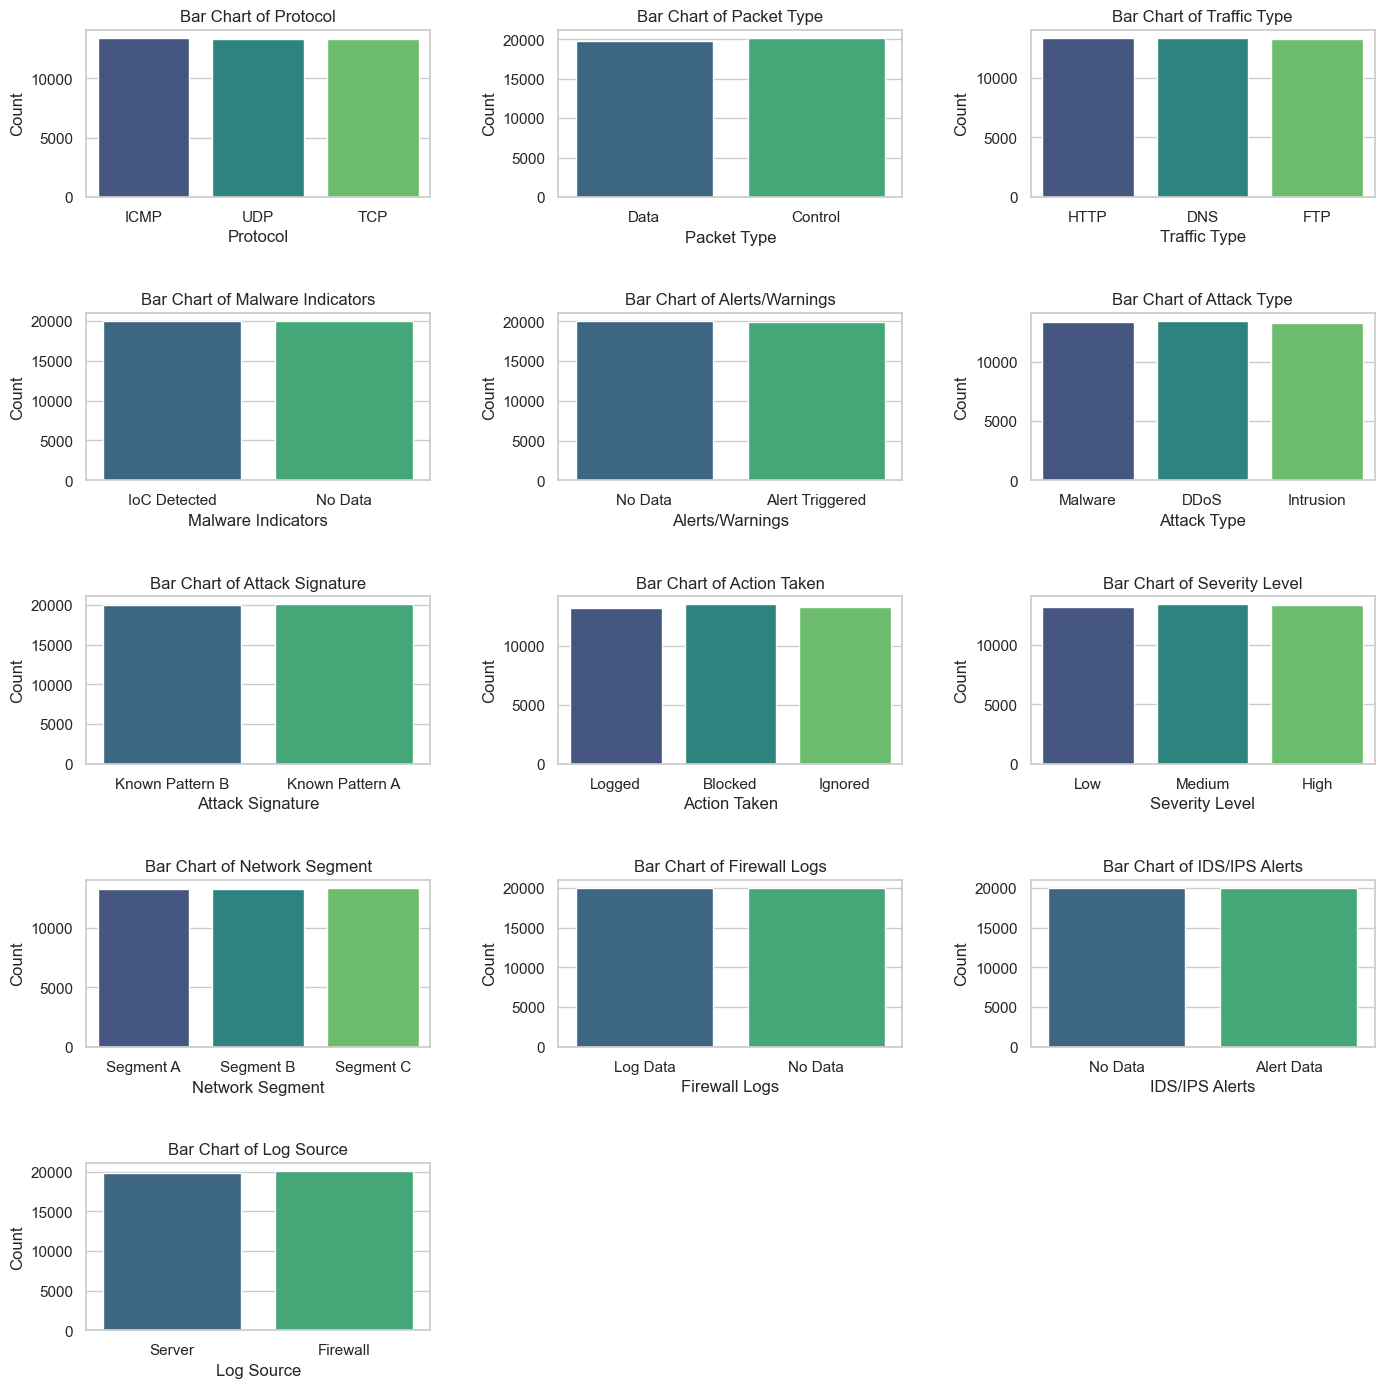

In [11]:
# Draw bar plot in each numeric columns
bar_char_columns = [col for col in data.columns if data[col].nunique() < 25 and (data[col].dtype in ["object", "int64", "float64"])]
print(f"List of columns are going to be drawn:")
print(bar_char_columns)

# Set theme for Seaborn charts
sns.set_theme(style="whitegrid")

# Determine the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(bar_char_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.tight_layout(pad=5.0)  # Adjust the padding between subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each bar chart in a subplot
for i, col in enumerate(bar_char_columns):
    sns.countplot(x=data[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Bar Chart of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

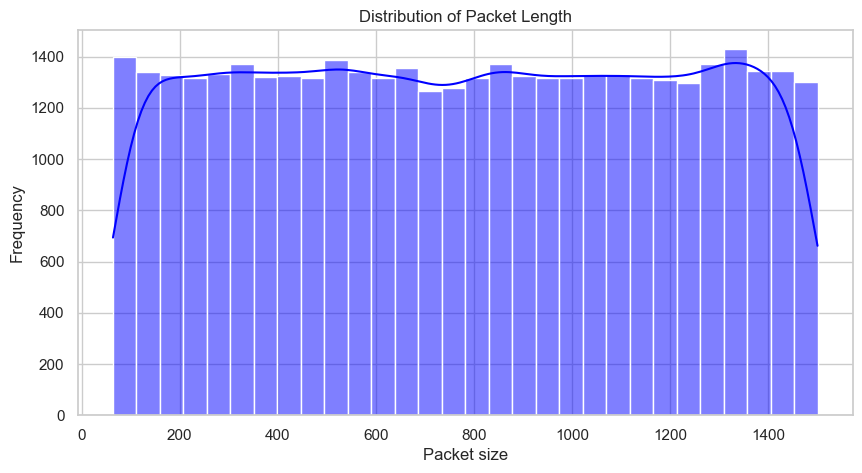

In [12]:
# Histplot for "Packet Length"
plt.figure(figsize=(10,5))
ax1 = sns.histplot(data= data["Packet Length"], bins= 30, kde = True, color= "blue")
ax1.set_title("Distribution of Packet Length")
ax1.set_xlabel("Packet size")
ax1.set_ylabel("Frequency")
plt.show()


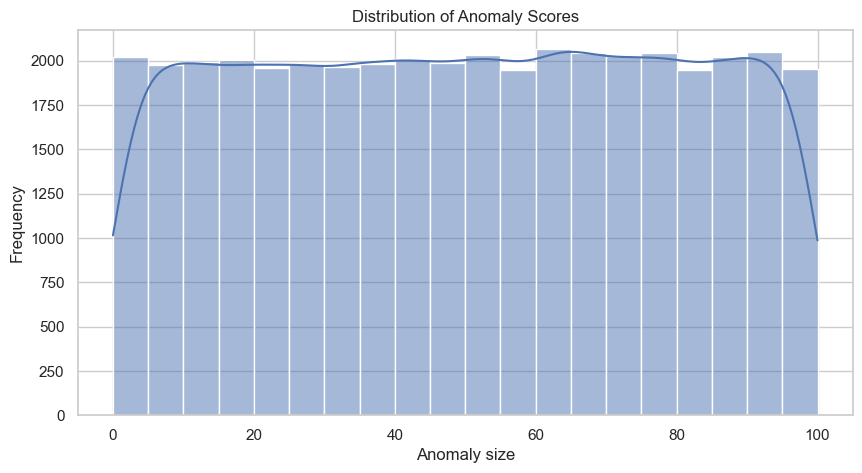

In [13]:
# Histplot for "Anomaly Scores"
plt.figure(figsize=(10,5))
ax1 = sns.histplot(data= data["Anomaly Scores"], bins= 20, kde = True)
ax1.set_title("Distribution of Anomaly Scores")
ax1.set_xlabel("Anomaly size")
ax1.set_ylabel("Frequency")
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_29528\1650642601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_counts.values, y=geo_counts.index, palette="coolwarm")


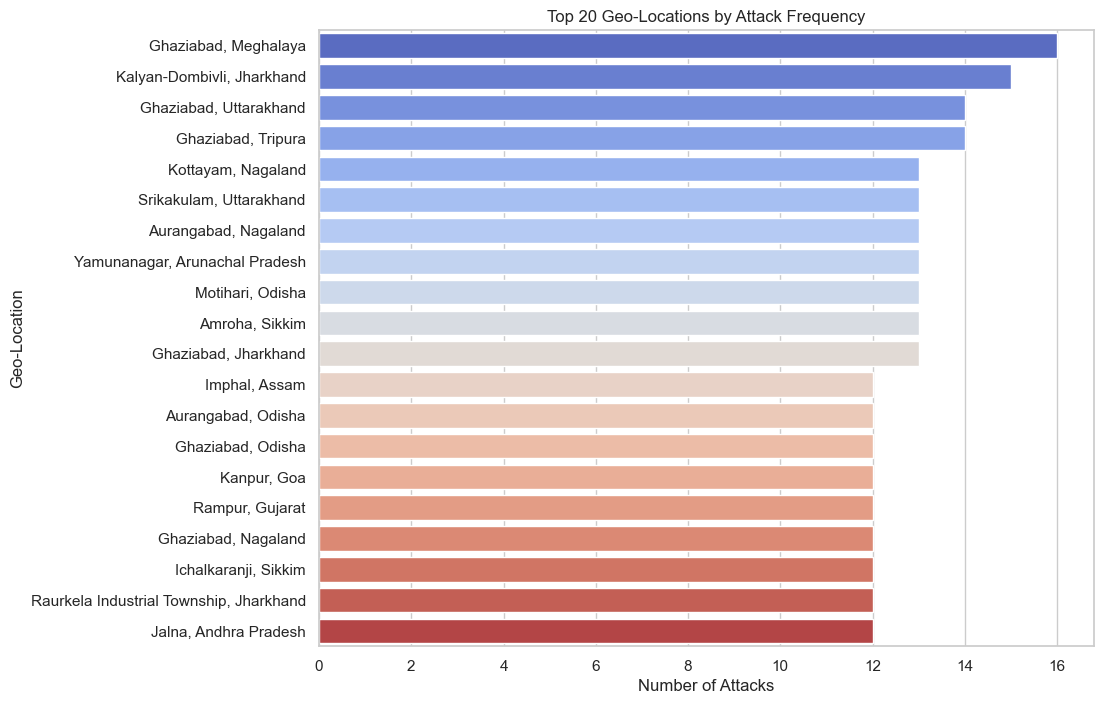

In [14]:
# Plotting the frequency of attacks by geo-location
geo_counts = data['Geo-location Data'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=geo_counts.values, y=geo_counts.index, palette="coolwarm")
plt.title('Top 20 Geo-Locations by Attack Frequency')
plt.xlabel('Number of Attacks')
plt.ylabel('Geo-Location')
plt.show()


The numeric columns to calculate correlation are: 
 Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
       'Hour', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')


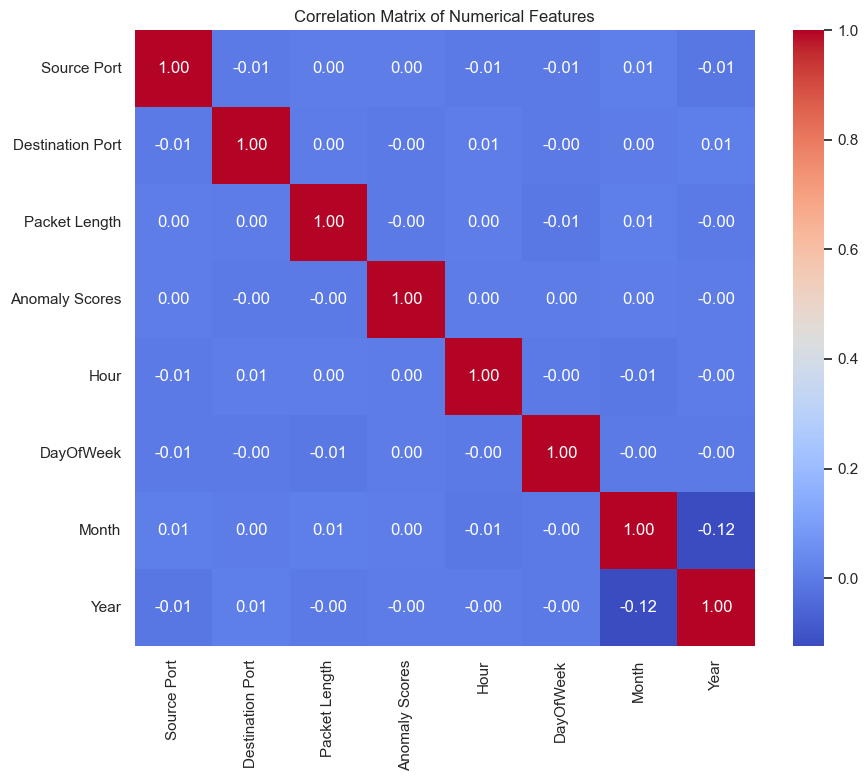

In [15]:
# Plot correlation matrix
numeric_columns = data.select_dtypes(include=["number"])
print(f"The numeric columns to calculate correlation are: \n {numeric_columns.columns}")
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm", fmt= ".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [16]:
# Check the frequency of other attributes
other_numeric_columns = ["Source IP Address ", "Destination IP Address","Source Port", "Destination Port" ]
top_source_ips = data['Source IP Address'].value_counts().max()
top_destination_ips = data['Destination IP Address'].value_counts().max()
top_Source_Port = data['Source Port'].value_counts().max()
top_Destination_Port = data['Destination Port'].value_counts().max()
top_Geographic_attack = data["Geo-location Data"].value_counts().max()
print(top_Geographic_attack)
print(top_source_ips)
print(top_destination_ips)
print(top_Source_Port)
print(top_Destination_Port)
print("The value spreads evenly, there is no significant frequency than others")

16
1
1
6
6
The value spreads evenly, there is no significant frequency than others


Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

The severity level group by Network Segment:
Severity level in numeric     1     2     3
Network Segment                            
Segment A                  4295  4534  4444
Segment B                  4463  4441  4415
Segment C                  4425  4460  4523


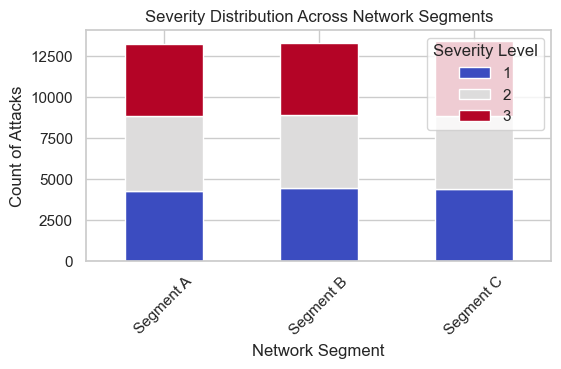

In [17]:
# tranfrom "Severity Level" to numeric value
severity_mapping = {"Low" : 1, "Medium" : 2, "High" : 3}
data["Severity level in numeric"] = data["Severity Level"].map(severity_mapping)

# Count the "Network Segment"
print(data["Network Segment"].value_counts())
print()
# Group the "Network Segment" attribute and count "Severity Level"  to check a network segment may suffer higher level of severity
segment_severity = data.groupby("Network Segment")["Severity level in numeric"].value_counts().unstack()
print("The severity level group by Network Segment:")
print(segment_severity)

# Visualize
segment_severity.plot(kind= "bar", stacked= True, colormap="coolwarm", figsize=(6,3))
plt.title('Severity Distribution Across Network Segments')
plt.xlabel('Network Segment')
plt.ylabel('Count of Attacks')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()


It shows that the severity level spreads out evenly in each network segment

Count the Attack Type: 
 Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

Distribute of severity level based on Attack Type: 
 Severity level in numeric     1     2     3
Attack Type                                
DDoS                       4450  4455  4523
Intrusion                  4374  4464  4427
Malware                    4359  4516  4432


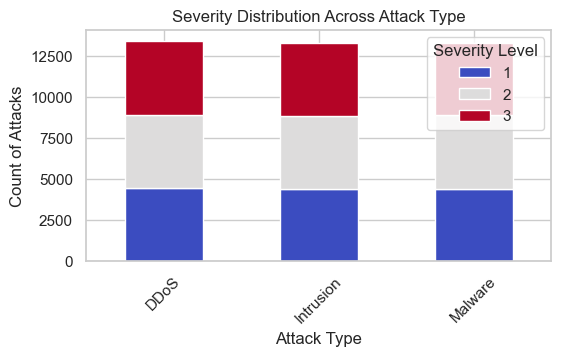

In [18]:
# Count the "Attack Type"
print("Count the Attack Type: \n",data["Attack Type"].value_counts())
print()

# Group the "Attack Type" attribute and count "Severity Level"  to check a network segment may suffer higher level of severity
attack_type_severity = data.groupby("Attack Type")["Severity level in numeric"].value_counts().unstack()
print("Distribute of severity level based on Attack Type: \n",attack_type_severity)

# Visualize
attack_type_severity.plot(kind= "bar", stacked= True, colormap="coolwarm", figsize=(6,3))
plt.title('Severity Distribution Across Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count of Attacks')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

Count the Alerts/Warnings: 
 Alerts/Warnings
No Data            20067
Alert Triggered    19933
Name: count, dtype: int64

Severity Distribution Across Alerts/Warnings: 
 Severity level in numeric     1     2     3
Alerts/Warnings                            
Alert Triggered            6569  6682  6682
No Data                    6614  6753  6700


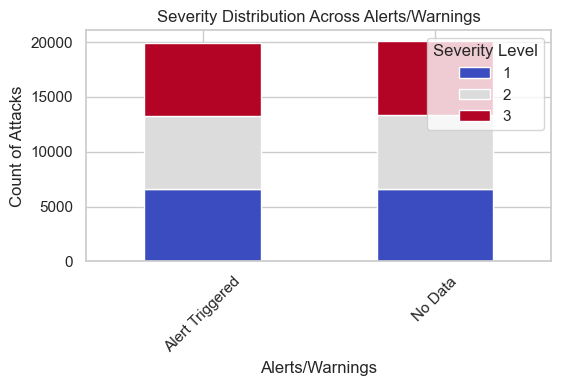

In [19]:
# Count the "Alerts/Warnings"
print("Count the Alerts/Warnings: \n",data["Alerts/Warnings"].value_counts())
print()
# Group the "Alerts/Warnings" attribute and count "Severity Level"  to check a network segment may suffer higher level of severity
attack_type_severity = data.groupby("Alerts/Warnings")["Severity level in numeric"].value_counts().unstack()
print("Severity Distribution Across Alerts/Warnings: \n", attack_type_severity)

# Visualize
attack_type_severity.plot(kind= "bar", stacked= True, colormap="coolwarm", figsize=(6,3))
plt.title('Severity Distribution Across Alerts/Warnings')
plt.xlabel('Alerts/Warnings')
plt.ylabel('Count of Attacks')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

Average 'Packet Lenght' and Severity level: 
   Severity Level  Packet Length
0           High     780.828576
1            Low     779.920504
2         Medium     783.577894

Average 'Packet Lenght' and Attack Type: 
   Attack Type  Packet Length
0        DDoS     785.348749
1   Intrusion     780.924387
2     Malware     778.047945


C:\Users\nguye\AppData\Local\Temp\ipykernel_29528\1569311508.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= packet_lengh_attack_type, x= "Attack Type", y = "Packet Length", palette="coolwarm")


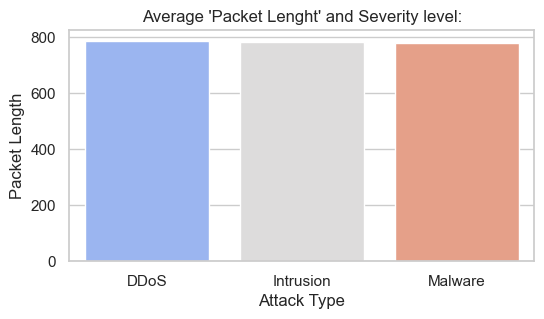

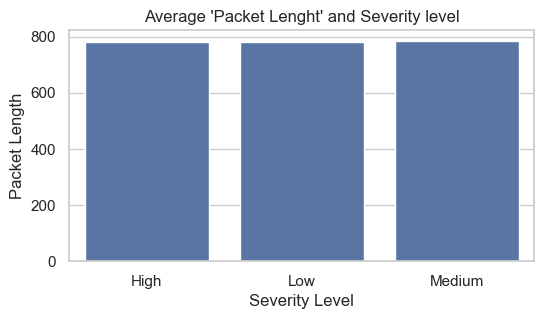

In [20]:
packet_lengh_severity_level = data.groupby("Severity Level")["Packet Length"].mean().reset_index()
print("Average 'Packet Lenght' and Severity level: \n",packet_lengh_severity_level)
print()
packet_lengh_attack_type = data.groupby("Attack Type")["Packet Length"].mean().reset_index()
print("Average 'Packet Lenght' and Attack Type: \n",packet_lengh_attack_type)
# Visualize
plt.figure(figsize=(6,3))
sns.barplot(data= packet_lengh_attack_type, x= "Attack Type", y = "Packet Length", palette="coolwarm")
plt.title("Average 'Packet Lenght' and Severity level:")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(data = packet_lengh_severity_level, x = "Severity Level", y = "Packet Length")
plt.title("Average 'Packet Lenght' and Severity level")
plt.show()


Cross-tabulation: Protocol vs. Attack Type: 
 Attack Type  DDoS  Intrusion  Malware
Protocol                             
ICMP         4508       4460     4461
TCP          4438       4397     4437
UDP          4482       4408     4409

Cross-tabulation: Traffic Type vs. Attack Type: 
 Attack Type   DDoS  Intrusion  Malware
Traffic Type                          
DNS           4528       4426     4422
FTP           4389       4453     4422
HTTP          4511       4386     4463

Cross-tabulation: Protocol vs. Severity Level: 
 Severity Level  High   Low  Medium
Protocol                          
ICMP            4455  4505    4469
TCP             4472  4386    4414
UDP             4455  4292    4552

Traffic Type vs. Severity Level: 
 Severity Level  High   Low  Medium
Traffic Type                      
DNS             4484  4446    4446
FTP             4424  4340    4500
HTTP            4474  4397    4489



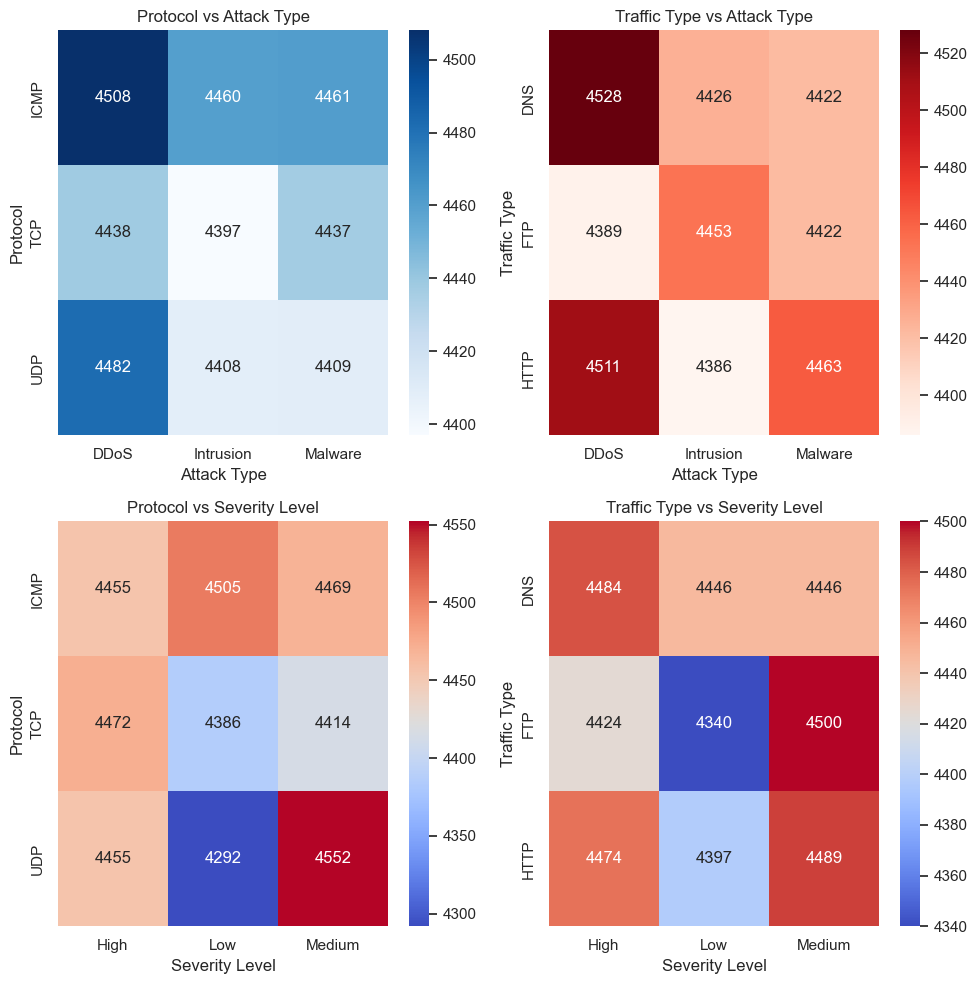

In [21]:
# Cross-tabulation: Protocol vs. Attack Type
protocol_attack_crosstab = pd.crosstab(data['Protocol'], data['Attack Type'])
print("Cross-tabulation: Protocol vs. Attack Type: \n",protocol_attack_crosstab)
print()


# Cross-tabulation: Traffic Type vs. Attack Type
traffic_attack_crosstab = pd.crosstab(data['Traffic Type'], data['Attack Type'])
print("Cross-tabulation: Traffic Type vs. Attack Type: \n",traffic_attack_crosstab)
print()


# Cross-tabulation: Protocol vs. Severity Level
protocol_severity_crosstab = pd.crosstab(data['Protocol'], data['Severity Level'])
print("Cross-tabulation: Protocol vs. Severity Level: \n",protocol_severity_crosstab)
print()
# Cross-tabulation: Traffic Type vs. Severity Level
traffic_severity_crosstab = pd.crosstab(data['Traffic Type'], data['Severity Level'])
print("Traffic Type vs. Severity Level: \n",traffic_severity_crosstab)
print()
# Visualization: Heatmaps to detect patterns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Protocol vs Attack Type
sns.heatmap(protocol_attack_crosstab, cmap="Blues", annot=True, fmt='d', ax=axes[0, 0])
axes[0, 0].set_title("Protocol vs Attack Type")

# Traffic Type vs Attack Type
sns.heatmap(traffic_attack_crosstab, cmap="Reds", annot=True, fmt='d', ax=axes[0, 1])
axes[0, 1].set_title("Traffic Type vs Attack Type")

# Protocol vs Severity Level
sns.heatmap(protocol_severity_crosstab, cmap="coolwarm", annot=True,fmt='d', ax=axes[1, 0])
axes[1, 0].set_title("Protocol vs Severity Level")

# Traffic Type vs Severity Level
sns.heatmap(traffic_severity_crosstab, cmap="coolwarm", annot=True,fmt='d', ax=axes[1, 1])
axes[1, 1].set_title("Traffic Type vs Severity Level")

plt.tight_layout()
plt.show()



# Part 2: Feature engineering

### Describe the feature engineering

1. **Timestamp Conversion & Time-Based Features**  
- The `Timestamp` column is converted to datetime format to enable extraction of various time-related features.  
- Extracted Features:  
  - `Hour`: The hour of the day (0-23).  
  - `DayOfWeek`: The day of the week (0 = Monday, 6 = Sunday).  
  - `Month`: The month of the year (1-12).  
  - `Year`: The year of the record.  


2. **Removing Duplicate Records**  



3. **Severity Level Mapping**  
- Converts the categorical `Severity Level` into numeric values for compatibility with machine learning models.  
  - `Low = 1`, `Medium = 2`, `High = 3`.  



4. **Browser Extraction**  
- Extracts browser type from the `Device Information` column using the `/` delimiter.  
- Helps identify the browser used by the source device.  



5. **Operating System Detection**  
- Uses a custom function to detect the operating system from `Device Information`.  
- Categories include: `Windows`, `MacOS`, `Linux`, `Android`, `iOS`, and `Other`.  



6. **Private IP Address Identification**  
- Adds two new features:  
  - `Is Source Private`: Checks if the `Source IP Address` belongs to private IP ranges.  
  - `Is Destination Private`: Checks if the `Destination IP Address` belongs to private IP ranges.  
- Private IP Ranges considered:  
  - `10.x.x.x`  
  - `172.16.x.x` to `172.31.x.x`  
  - `192.168.x.x`  



7. **Port Categorization**  
- Converts `Source Port` and `Destination Port` to categorical types:  
  - `Well-known`: Ports `0–1023`.  
  - `Registered`: Ports `1024–49151`.  
  - `Dynamic`: Ports `49152–65535`.  



8. **Additional Time-Based Features**  
- `Is Night Traffic`: Identifies if the traffic occurs during night hours (6 PM - 6 AM).  
- `Is Weekend`: Checks if the activity happens on a weekend (Saturday = 6, Sunday = 7).  



In [22]:
# Convert timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extracting time-based features
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year

# Remove duplicate records
data = data.drop_duplicates()
data.head(3)

# tranfrom "Severity Level" to numeric value
severity_mapping = {"Low" : 1, "Medium" : 2, "High" : 3}
data["Severity level in numeric"] = data["Severity Level"].map(severity_mapping)

# Create a new column named "Browser" by extracting from columns "Device Information"
data["Browser"] = data["Device Information"].str.split("/").str[0]
data["Browser"].value_counts()

# Function to extract OS type
def extract_os(user_agent):
    user_agent = user_agent.lower()
    if "windows" in user_agent:
        return "Windows"
    elif "mac os" in user_agent or "macintosh" in user_agent:
        return "MacOS"
    elif "linux" in user_agent:
        return "Linux"
    elif "android" in user_agent:
        return "Android"
    elif "iphone" in user_agent or "ipad" in user_agent:
        return "iOS"
    else:
        return "Other"

# Apply functions to extract Browser & OS
data['Operating System'] = data['Device Information'].apply(extract_os)



# Creating new features
private_ip_ranges = [10, 172, 192]
data['Is Source Private'] = data['Source IP Address'].apply(lambda x: int(x.split('.')[0]) in private_ip_ranges).astype(int)
data['Is Destination Private'] = data['Destination IP Address'].apply(lambda x: int(x.split('.')[0]) in private_ip_ranges).astype(int)



# Convert ports to categorical types
def categorize_port(port):
    if port <= 1023:
        return "Well-known"
    elif port <= 49151:
        return "Registered"
    else:
        return "Dynamic"

data['Source Port Category'] = data['Source Port'].apply(categorize_port)
data['Destination Port Category'] = data['Destination Port'].apply(categorize_port)



# Create new time-based features
data['Is Night Traffic'] = ((data['Hour'] >= 18) | (data['Hour'] <= 6)).astype(int)
data['Is Weekend'] = data['DayOfWeek'].isin([6, 7]).astype(int)


print(data.info())
data.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  40000 non-null  datetime64[ns]
 1   Source IP Address          40000 non-null  object        
 2   Destination IP Address     40000 non-null  object        
 3   Source Port                40000 non-null  int64         
 4   Destination Port           40000 non-null  int64         
 5   Protocol                   40000 non-null  object        
 6   Packet Length              40000 non-null  int64         
 7   Packet Type                40000 non-null  object        
 8   Traffic Type               40000 non-null  object        
 9   Payload Data               40000 non-null  object        
 10  Malware Indicators         40000 non-null  object        
 11  Anomaly Scores             40000 non-null  float64       
 12  Aler

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year,Severity level in numeric,Browser,Operating System,Is Source Private,Is Destination Private,Source Port Category,Destination Port Category,Is Night Traffic,Is Weekend
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023,1,Mozilla,Windows,0,0,Registered,Registered,1,0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,No Data,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Data,Log Data,No Data,Firewall,7,2,8,2020,1,Mozilla,Windows,0,0,Registered,Registered,0,0


# Part 4:  Machine Learning Models

# XGBoost



### Overview of building XGBoost model

1. Attack Type Mapping 
- The `Attack Type` is converted to numeric for machine learning models.    
  - `DDoS = 0`  
  - `Malware = 1`  
  - `Intrusion = 2`  


2. Feature Selection
- Most features are select excepting some unusefull feature likes: timestampt, Payload Data, User Information 
 
3. Encoding Categorical Features (One-Hot Encoding)  
- The categorical columns are transformed using `OneHotEncoder` to give a binary outcome  
- Categorical Columns:  
  - Protocol, Packet Type, Traffic Type, Malware Indicators, Alerts/Warnings, Attack Signature,
Action Taken, Network Segment, Firewall Logs, IDS/IPS Alerts, Log Source, Severity Level,
Browser, Operating System, Source Port Category, Destination Port Category.
 

4. Combining Encoded Features
- Combining categorical data with numeric data to form an one completed dataframe.  


5. Splitting Data for Training and Testing
- The processed dataset is split into training and testing sets using `train_test_split()` with an `80-20` ratio.  
- The split is stratified to ensure balanced representation of classes.  


6. Hyperparameter Tuning with `RandomizedSearchCV`


7. Model Training (XGBoost Classifier)
- The best hyperparameters obtained from `RandomizedSearchCV` are used to train the XGBoost model.  
- The model is retrained using the top 10 most important features identified by `xgb.plot_importance()`.  



8. Model Evaluation 
- Predictions are made on the test set and evaluated using the following metrics:  
  - Accuracy  
  - Precision (Weighted)  
  - Recall (Weighted)  
  - F1-Score (Weighted)  
- Classification Report and Confusion Matrix are generated to visualize performance.  
- Labels used in Confusion Matrix: `DDoS`, `Malware`, `Intrusion`.  

9. Model Saving
- The optimized model is saved using `joblib` for future use and deployment.  




In [23]:
# Attack Type is distributed evenly
data["Attack Type"].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [24]:
# Map "Attack Type" to numeric value
attack_type_mapping = {"DDoS" : 0,"Malware" : 1, "Intrusion" : 2}
data["Attack Type Numeric"] = data["Attack Type"].map(attack_type_mapping)

In [25]:
data.head(1)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year,Severity level in numeric,Browser,Operating System,Is Source Private,Is Destination Private,Source Port Category,Destination Port Category,Is Night Traffic,Is Weekend,Attack Type Numeric
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023,1,Mozilla,Windows,0,0,Registered,Registered,1,0,1


In [26]:
data.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year', 'Severity level in numeric',
       'Browser', 'Operating System', 'Is Source Private',
       'Is Destination Private', 'Source Port Category',
       'Destination Port Category', 'Is Night Traffic', 'Is Weekend',
       'Attack Type Numeric'],
      dtype='object')

In [27]:
selected_columns = ["Protocol", "Packet Length","Packet Type","Traffic Type","Malware Indicators",
                    "Anomaly Scores","Alerts/Warnings","Attack Signature","Action Taken",
                    "Network Segment","Firewall Logs","IDS/IPS Alerts","Log Source","Hour","DayOfWeek","Month",
                    "Year","Severity Level","Browser","Operating System","Is Source Private","Is Destination Private",
                    "Source Port Category","Destination Port Category","Is Night Traffic","Is Weekend"]



# One Hot Encoding for all categorical data

# Identify categorical columns
categorical_columns =  ["Protocol", "Packet Type","Traffic Type","Malware Indicators",
                    "Alerts/Warnings","Attack Signature","Action Taken",
                    "Network Segment","Firewall Logs","IDS/IPS Alerts","Log Source","Severity Level",
                    "Browser","Operating System",
                    "Source Port Category","Destination Port Category"]

# Instantiate OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
# Fit and transform categorical columns
encoded_array = encoder.fit_transform(data[categorical_columns])
encoded_array


c:\Users\nguye\anaconda3\envs\AIengineer\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [28]:
# Convert encoded_array to a DataFrame with clear column names
encoded_df = pd.DataFrame(encoded_array, 
                          columns=encoder.get_feature_names_out(categorical_columns),
                          index=data.index)


In [29]:

# Concatenate with the original DataFrame (excluding original categorical columns)
data_encoded = pd.concat([data[selected_columns].drop(categorical_columns, axis=1).reset_index(drop=True), 
                          encoded_df.reset_index(drop=True)], axis=1)



In [30]:
X = data_encoded
y = data["Attack Type Numeric"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 22, stratify= y)

#  Define Hyperparameter Grid for Tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 6, 9],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for updating trees
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction needed to make a split
    'reg_lambda': [0, 1, 10]  # L2 regularization (prevents overfitting)
}


In [31]:

# Initialize and Train the XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective = "multi:softmax",
    num_class = len(y.unique()),
    eval_metric = "mlogloss",
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    tree_method = "hist",
    enable_categorical = True,
    random_state = 42
)



In [32]:

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=1 
)


print("\n Running Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)



 Running Randomized Search for Hyperparameter Tuning...


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_class=3, num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300],
                                        'reg_lambda': [0, 1, 10],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [33]:

#  Train XGBoost Model with Best Parameters
best_params = random_search.best_params_
print("\n Best Hyperparameters Found:", best_params)

xgb_model_optimized = xgb.XGBClassifier(
    **best_params,
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    enable_categorical=True,
    random_state=42
)

print("\ Training Optimized XGBoost Model...")
xgb_model_optimized.fit(X_train, y_train)

#Model Evaluation
y_pred = xgb_model_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print Model Performance
print("\n Optimized Model Evaluation Metrics:")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")


 Best Hyperparameters Found: {'subsample': 1.0, 'reg_lambda': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
\ Training Optimized XGBoost Model...

 Optimized Model Evaluation Metrics:
 Accuracy: 0.3327
 Precision: 0.3321
Recall: 0.3327
 F1-Score: 0.3303


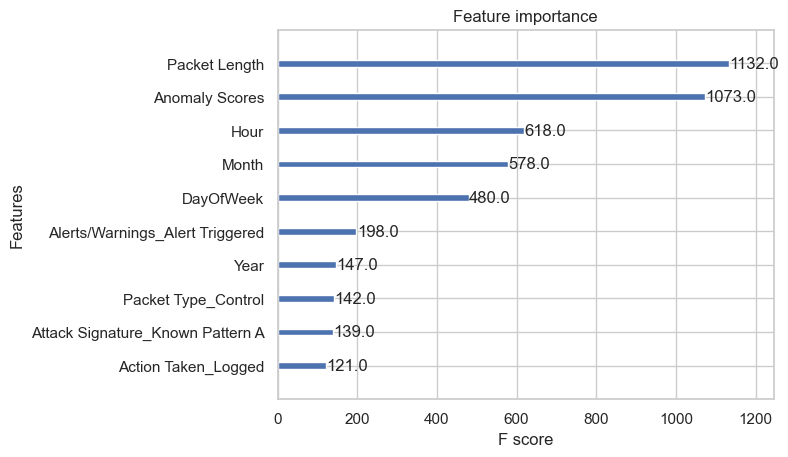

In [34]:
xgb.plot_importance(xgb_model_optimized, max_num_features=10)
plt.show()





\ Training Optimized XGBoost Model...

 Optimized Model Evaluation Metrics:
 Accuracy: 0.3370
 Precision: 0.3363
Recall: 0.3370
 F1-Score: 0.3353
Model Evaluation Metrics:

 Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.40      0.37      2686
           1       0.35      0.33      0.34      2661
           2       0.32      0.28      0.30      2653

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



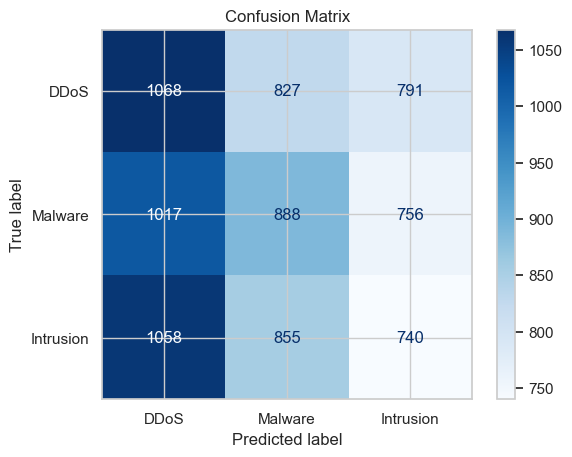

['xgb_model_optimized_model.pkl']

In [35]:
# Re-train the model with 10 importance features, with best parameters

X = data_encoded[["Packet Length", "Anomaly Scores", "Hour","Month","DayOfWeek","Alerts/Warnings_Alert Triggered", "Year","Action Taken_Logged","Packet Type_Control", "Is Source Private"]]
y = data["Attack Type Numeric"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 22, stratify= y)

# Initialize and Train the XGBoost Model
xgb_model_optimized = xgb.XGBClassifier(
    **best_params,
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    enable_categorical=True,
    random_state=42
)

print("\ Training Optimized XGBoost Model...")
xgb_model_optimized.fit(X_train, y_train)

#Model Evaluation
y_pred = xgb_model_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print Model Performance
print("\n Optimized Model Evaluation Metrics:")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")

#  Print Evaluation Metrics
print("Model Evaluation Metrics:")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
labels = ["DDoS" , "Malware", "Intrusion"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

import joblib

# Download model
joblib.dump(xgb_model_optimized, "xgb_model_optimized_model.pkl")


### Confusion Matrix Interpretation

- **DDoS (0):**
  - Correctly classified as DDoS: **1100**
  - Misclassified as Malware: **812**
  - Misclassified as Intrusion: **774**
  
- **Malware (1):**
  - Correctly classified as Malware: **849**
  - Misclassified as DDoS: **1054**
  - Misclassified as Intrusion: **758**

- **Intrusion (2):**
  - Correctly classified as Intrusion: **738**
  - Misclassified as DDoS: **1111**
  - Misclassified as Malware: **804**

#### Important Observations:
- The performance is significantly low, showing that the model cannot predict the dependent variable.
- **DDoS (0)** has the best prediction's accuracy, but it is dued to chance not based on the model computation.
- **Intrusion (2)** performs the lowest among the others two categories.

#### Feature Importance

- Packet Length and Anomaly Scores are the most critical references for the model to predict.
- Extracting features like Hour, Month, and DayOfWeek also contribute well to the prediction.



# Random Forest

Despite using the **highest performing hyperparameters from the XGBoost model**, the Random Forest model still demonstrates poor performance. 


                           Feature  Importance
1                   Anomaly Scores    0.254241
0                    Packet Length    0.246374
2                             Hour    0.136401
3                            Month    0.113342
4                        DayOfWeek    0.090377
6                             Year    0.063591
8              Packet Type_Control    0.029391
7              Action Taken_Logged    0.029257
5  Alerts/Warnings_Alert Triggered    0.026624
9                Is Source Private    0.010402
Model Evaluation Metrics:

 Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.36      0.34      2686
           1       0.34      0.35      0.35      2661
           2       0.32      0.29      0.31      2653

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



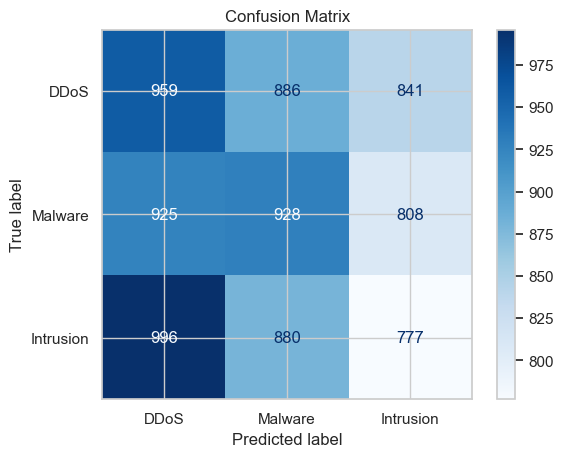

In [36]:
rf_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=10,  
    random_state=42
)

rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df[0:10])
#  Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#  Print Evaluation Metrics
print("Model Evaluation Metrics:")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
labels = ["DDoS" , "Malware", "Intrusion"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Comparison of Random Forest vs. XGBoost Model

#### 1. Feature Importance

- **Packet Length** and **Anomaly Scores** are still the most critical referance in both models.
- Two models use almost the same importance features.

#### 2. Confusion Matrix Comparison

- XGBoost has better true positive percentage for all categories compared to Random Forest.
- Random Forest show a poor capacity to classify between all categories, particularly in Intrusion.


#### 3. Classification Performance Comparison

- The XGBoost model perform better than the Random Forest model in precision, recall, F1-score, and accuracy.


# Multi Logistic Regression



Despite already trying powerful models like XGBoost and Random Forest, their performance was extremely low.

Try to use Logistic Regression, the purpose is to test whether a simpler model can have a better performance  


#### Feature Scaling by StandardScaler
- StandardScaler is applied to normalize the data by zero mean and unit variance.
- Pipeline is added to make a fluid preprocessing.


In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Define model and parameters
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2', 'none'],  
}

# Setup GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, verbose=1, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model result
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

# Test set evaluation
test_accuracy = grid.score(X_test, y_test)
print("Test set accuracy: {:.3f}".format(test_accuracy))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\nguye\anaconda3\envs\AIengineer\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\nguye\anaconda3\envs\AIengineer\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\nguye\anaconda3\envs\AIengineer\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\nguye\anaconda3\envs\AIengineer\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\nguye\anaconda3\envs\AIengineer\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `p

Best parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Best cross-validation score: 0.337
Test set accuracy: 0.338


### Model Performance Comparison
#### Logistic Regression Performance:  
- Near outcome to the Random Forest model but poorer than XGBoost
- Accuracy are is low 33.8%, although using cross validation and hyper parameter. 
#### XGBoost Performance:  
- XGBoost has the highest performance between three models, although the outcomes are significantly low with nearly accuracy of 40%.  
- However XGBoost is chosen the winning model, thanks to the capacity of handiling complex features, agains overfiting, overall simpler in data preperating.



# Part 5: Remark
- Through the EDA step, it shows that the dataset is well balance in all numerics, categories features. Moreover, even after the aggregration process, the outcomes remain well balance.
- Since the dataset seems to be synthetic to  missleading the machine learning models, it explains why all the models are struggled to predict.
- However, based on the highest performance amongs three models, XGBoost has the most promising performance.


#### --> Chosing XGBoost model to make prediction on the dataset, and integrating it with the website's prediction function
